In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Fetching data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [4]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [5]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    143 non-null    float64
 1   High    143 non-null    float64
 2   Low     143 non-null    float64
 3   Close   143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [6]:
# Scaling data
column = "Close"
MS = MinMaxScaler()
data1 = MS.fit_transform(stk_data[[column]])

In [7]:
# Splitting the data into train and test sets
training_size = round(len(data1) * 0.80)
X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Define trends and lags
#trends = ['n', 't', 'c', 'ct']
orders = [(1,1,1),(1,1,2),(2,3,1),(2,2,2)]

In [10]:
# Function to calculate RMSE and MAPE
def rmsemape(actual, predicted):
    mse = mean_squared_error(actual, predicted, squared=False)
    print(f"RMSE: {mse}")
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"MAPE: {mape}%")
    return mse, mape

In [11]:
# Training and evaluating models
import numpy as np
for i in orders:
#for td in trends:
    model = ARIMA(X_train,order=i)
    model_fit = model.fit()
    y_pred = model_fit.predict(len(X_train), len(data1) - 1)
    #print(f"Trend={td}")
    rmsemape(y_test, y_pred)
    print("****")

RMSE: 0.14994694135877779
MAPE: 85.78187700410213%
****
RMSE: 0.16666743213641588
MAPE: 113.2288724491234%
****
RMSE: 0.4353825345369647
MAPE: 261.29352227305486%
****
RMSE: 0.1555431943015026
MAPE: 78.57322291878725%
****


In [12]:
# Forecasting
i = (2,2,2)
#td = 'ct'
model = ARIMA(X_train, order=i)
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

In [13]:
y_pred

array([0.3067471 , 0.31371029, 0.30402047, 0.3106073 , 0.301202  ,
       0.30748706, 0.29837194, 0.30437061, 0.29553614, 0.30125926,
       0.29269518, 0.29815293, 0.2898493 , 0.29505143, 0.28699866,
       0.2919546 , 0.28414346, 0.28886225, 0.28128385, 0.28577423,
       0.27841999, 0.28269036, 0.27555206, 0.27961051, 0.27268018,
       0.27653453, 0.26980451, 0.27346226, 0.26692519])

In [14]:
# Inverse transform the scaled data
aTestNormTable = pd.DataFrame(y_test, columns=[column])
actual_stock_price_test_ori = MS.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = pd.DataFrame(actual_stock_price_test_ori, columns=[column])

In [15]:
actual_stock_price_test_oriA

,Close
0,709.650024
1,688.900024
2,674.349976
3,665.849976
4,669.349976
5,678.799988
6,667.500000
7,672.150024
8,675.450012
9,670.500000


In [16]:
pTestNormTable = pd.DataFrame(y_pred, columns=[column])
predicted_stock_price_test_ori = MS.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = pd.DataFrame(predicted_stock_price_test_ori, columns=[column])

In [17]:
predicted_stock_price_test_oriP

,Close
0,710.608913
1,711.959772
2,710.079948
3,711.357792
4,709.533165
5,710.752464
6,708.984132
7,710.147874
8,708.433986
9,709.544272


In [18]:
# Plotting actual vs predicted prices
import matplotlib.pyplot as plt


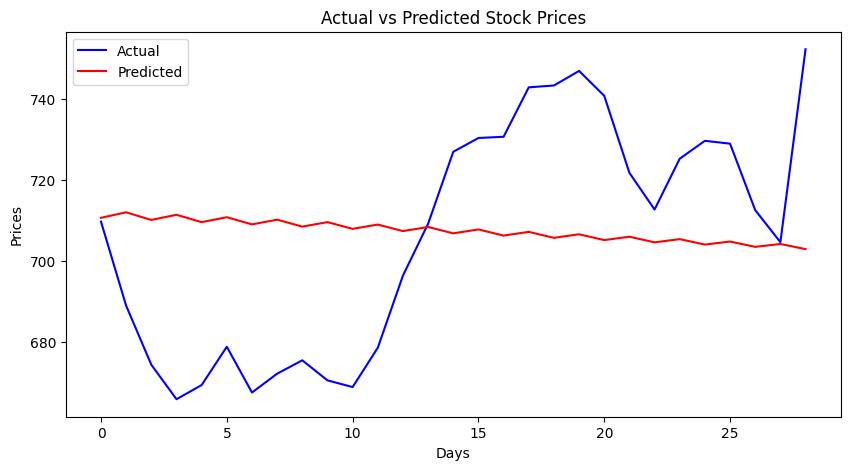

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA.values, color='blue', label="Actual")
plt.plot(predicted_stock_price_test_oriP.values, color='red', label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.show()

In [20]:
# Forecasting future prices
forecast = model_fit.predict(len(data1), len(data1) + 3)
fTestNormTable = pd.DataFrame(forecast, columns=["Closefore"])
forecast_stock_price_test_ori = MS.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF = pd.DataFrame(forecast_stock_price_test_ori, columns=["Closefore"])

In [21]:
forecast

array([0.27039358, 0.26404236, 0.26732835, 0.26115613])

In [22]:
fTestNormTable

,Closefore
0,0.270394
1,0.264042
2,0.267328
3,0.261156


In [23]:
forecast_stock_price_test_ori

array([[703.55632989],
       [702.32419278],
       [702.9616752 ],
       [701.76426529]])

In [24]:
forecast_stock_price_test_oriF

,Closefore
0,703.556330
1,702.324193
2,702.961675
3,701.764265


In [26]:
# Save forecasted prices to CSV
forecast_stock_price_test_oriF.to_csv("CloseDataARIMA.csv", index=False)

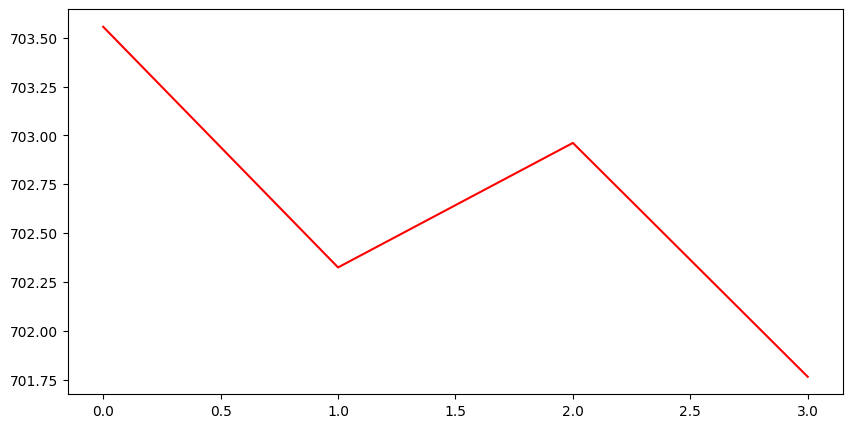

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")